## Initial code

In [1]:
import os
import sys


curr_dir = os.getcwd()
parent_dir = os.path.dirname(curr_dir)
sys.path.append(parent_dir)


import psutil
from utils import check_and_install
    
# List of packages to check, with any special names or setup functions
packages = [
    "pandas",
    "numpy",
    "matplotlib",
    "seaborn",
    "scikit-learn",
    "scipy",
    "tqdm",
    "pandarallel",
    "thinc",
    "srsly",
    "fastai",
    "matplotlib-venn",
    "ipympl",
    "jupyterlab",
    "ipywidgets",

]

# Loop through each package, importing and installing if needed
for package in packages:
    check_and_install(package)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets


from multiprocessing import Pool
from matplotlib_venn import venn3
from IPython.display import display


from pandarallel import pandarallel

real_cpu_count = psutil.cpu_count(logical=False)
pandarallel.initialize(progress_bar=True)
widgets.Widget.widgets = {}  # Clear widget state



scikit-learn not found, installing...
scikit-learn has been installed
matplotlib-venn not found, installing...
matplotlib-venn has been installed
INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
DatasetRaces = pd.read_csv("../dataset/races_filled.csv")
DatasetCyclists = pd.read_csv("../dataset/cyclists_filled.csv")

MergedDataset = pd.merge(DatasetCyclists, DatasetRaces.drop(columns=['name']), left_on='_url', right_on='cyclist', suffixes=('_cyclist', '_race')).drop(columns=['_url_cyclist']) 
del MergedDataset['race_year']

print(MergedDataset.duplicated().sum())
print(MergedDataset.isnull().sum())

MergedDataset.sample(3)


0
name                      0
birth_year                0
weight                    0
height                    0
nationality               0
expected_url              0
_url_race                 0
points                    0
uci_points                0
length                    0
climb_total               0
profile                   0
startlist_quality         0
date                      0
position                  0
cyclist                   0
cyclist_age               0
is_tarmac                 0
is_cobbled                0
is_gravel                 0
cyclist_team         158681
delta                     0
dtype: int64


,name,birth_year,weight,height,nationality,expected_url,_url_race,points,uci_points,length,...,startlist_quality,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
222311,Francis De Greef,1985.0,77.0,193.0,Belgium,francis-de-greef,vuelta-a-espana/2013/stage-19,0.0,0.0,181000.0,...,1128,2013-09-13 04:34:13,121,francis-de-greef,28.0,True,False,False,austria-1991,1089.0
14088,Stef Clement,1982.0,66.0,181.0,Netherlands,stef--clement,vuelta-a-espana/2012/stage-10,0.0,0.0,166400.0,...,852,2012-08-28 04:51:13,161,stef-clement,30.0,True,False,False,czechoslovakia-1987,229.0
515963,Volodymyr Gustov,1977.0,64.0,179.0,Ukraine,volodymyr--gustov,tour-de-romandie/2008/prologue,0.0,0.0,1900.0,...,590,2008-04-29 00:02:16,100,volodymyr-gustov,31.0,True,False,False,euskaltel-euskadi-2010,9.0


In [3]:
outliers_lof = pd.read_csv('../dataset/outliers_lof.csv')
outliers_iso_for = pd.read_csv('../dataset/outliers_iso_for.csv')
outliers_oc_svm_gpu = pd.read_csv('../dataset/outliers_oc_svm.csv')

all_outliers_indexes = outliers_lof.index.union(outliers_iso_for.index).union(outliers_oc_svm_gpu.index)
all_normal_indexes = MergedDataset.index.difference(all_outliers_indexes)

NumericalDataset = MergedDataset.select_dtypes(include=[np.number])

normal_lof = MergedDataset[~MergedDataset['_url_race'].isin(outliers_lof['name_race'])]
normal_iso_for = MergedDataset[~MergedDataset['_url_race'].isin(outliers_iso_for['name_race'])]
normal_oc_svm = MergedDataset[~MergedDataset['_url_race'].isin(outliers_oc_svm_gpu['name_race'])]

normal_lof_num = normal_lof.select_dtypes(include=[np.number])
normal_iso_for_num = normal_iso_for.select_dtypes(include=[np.number])
normal_oc_svm_num = normal_oc_svm.select_dtypes(include=[np.number])

outliers_lof_num = outliers_lof.select_dtypes(include=[np.number])
outliers_iso_for_num = outliers_iso_for.select_dtypes(include=[np.number])
outliers_oc_svm_num = outliers_oc_svm_gpu.select_dtypes(include=[np.number])

normal_lof.sample(3)

,name,birth_year,weight,height,nationality,expected_url,_url_race,points,uci_points,length,...,startlist_quality,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
335586,Samuele Schiavina,1971.0,78.052209,188.469757,Italy,samuele--schiavina,giro-d-italia/1994/stage-5,8.0,2.0,158000.0,...,1292,1994-05-26 03:41:39,9,samuele-schiavina,23.0,True,False,False,NaN,10.0
460356,Patrick Versluys,1958.0,62.666569,167.912308,Belgium,patrick--versluys,paris-nice/1984/stage-2a,0.0,0.0,101000.0,...,778,1984-03-09 02:41:03,16,patrick-versluys,26.0,True,False,False,NaN,28.0
192542,Francesco Casagrande,1970.0,64.000000,171.000000,Italy,francesco--casagrande,san-sebastian/1995/result,38.0,55.0,234000.0,...,1346,1995-08-12 05:33:07,11,francesco-casagrande,25.0,False,False,False,o.n.c.e.-deutsche-bank-2000,114.0


## Outliers analysis

Since each run of the algorithms might produce different parameters and different outliers, we will use the outliers generated by the main notebook.

### Outliers feature

Most important features for outliers detection:
Feature
height               1637
startlist_quality    1026
cyclist_age           984
weight                899
length                880
climb_total           750
points                 69
uci_points             41
Name: count, dtype: int64



Summary statistics:
                     Normal_Mean    Normal_Std   Outlier_Mean   Outlier_Std  \
weight                 68.401828      6.229843      68.125137      6.240198   
height                179.640157      6.309291     181.065320      7.434853   
points                  3.612285     15.322920       1.872733     11.046947   
uci_points              3.936265     27.097255       2.304009     21.619874   
length             166808.424963  64569.715337  164845.513840  63276.753706   
climb_total          2336.041259   1299.750985    2345.053770   1321.927165   
startlist_quality    1100.768626    380.633079    1091.760261    378.380121   
cyclist_age            28.478370      3.857781      28.

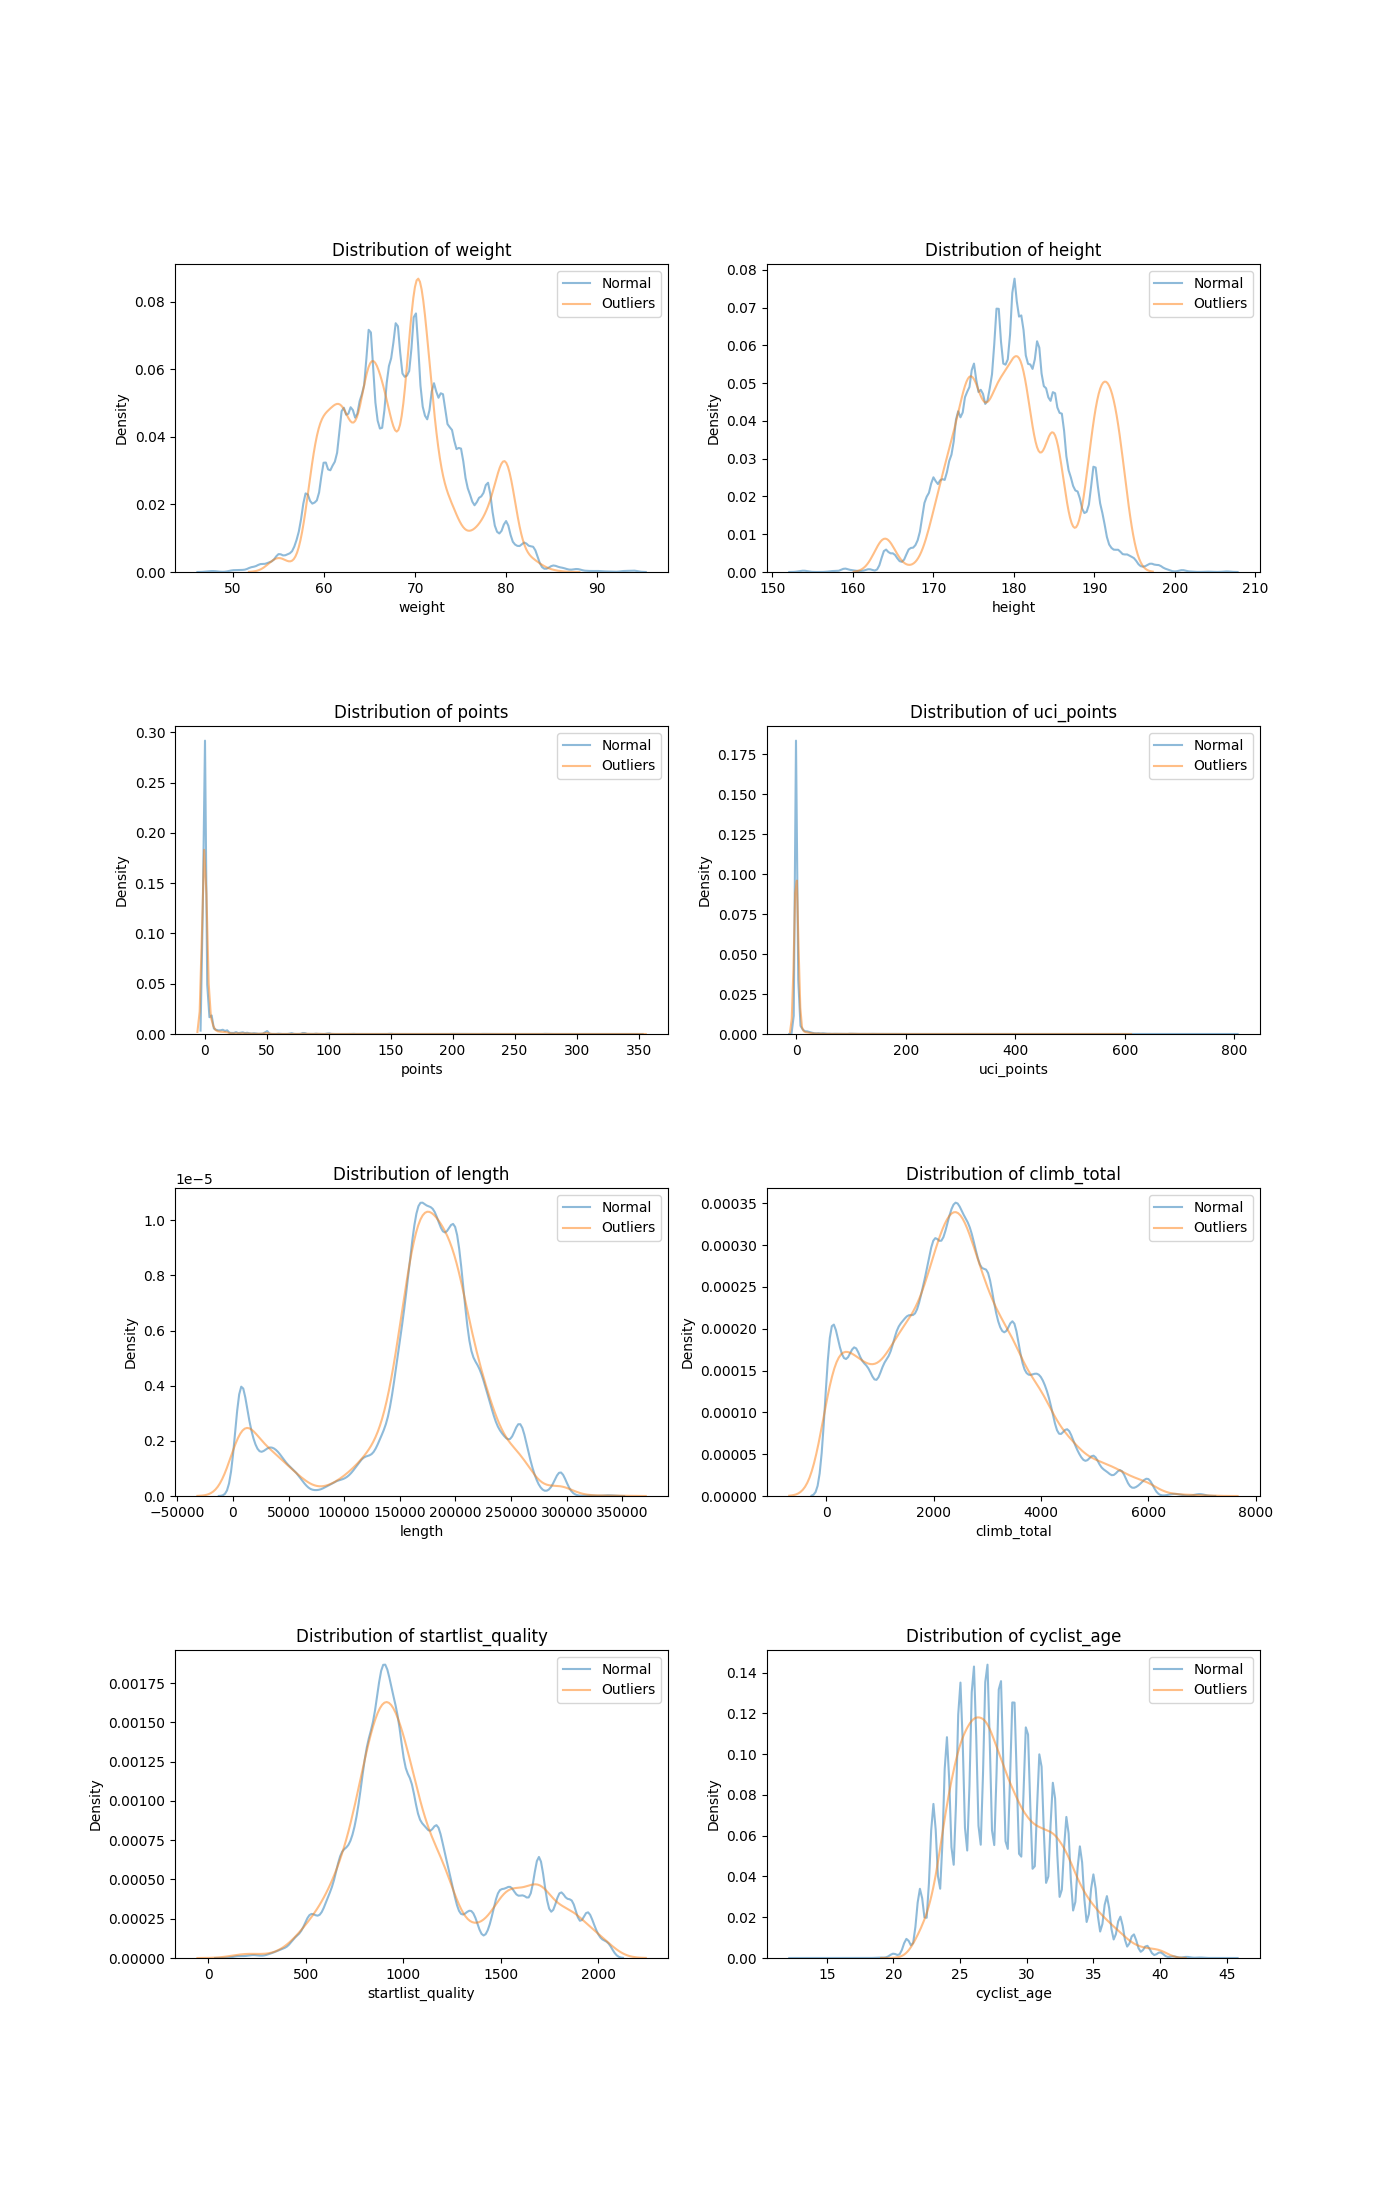

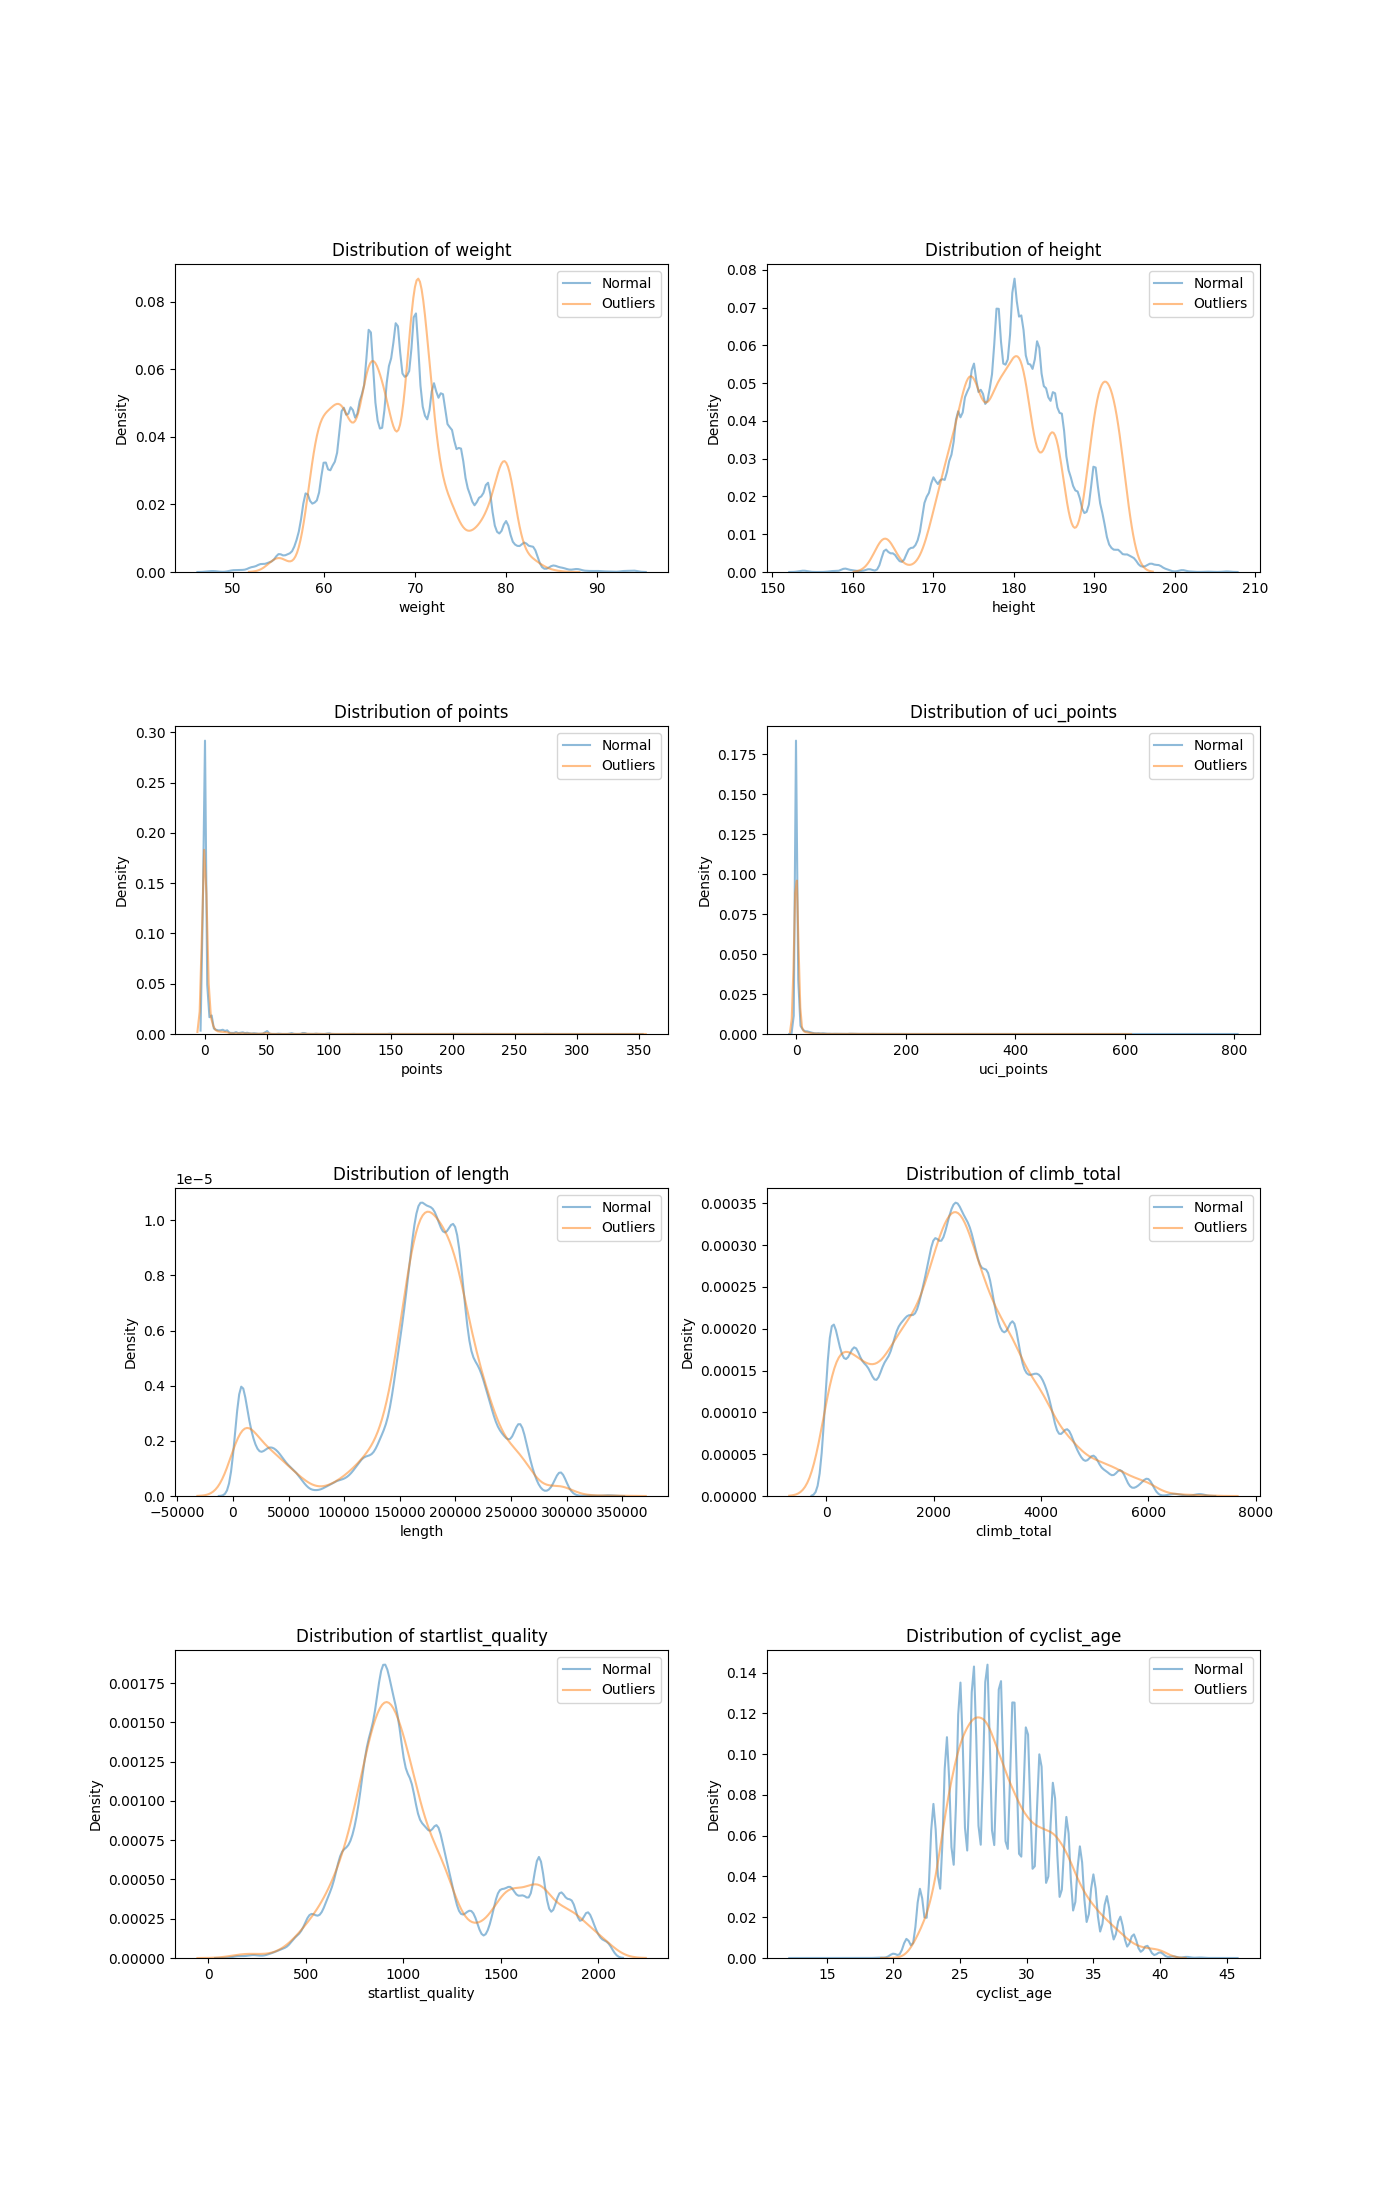

In [6]:
from outliers_code.outliers_analysis import analyze_outlier_characteristics

numerical_features = ['weight', 'height', 'points', 'uci_points', 'length', 
                     'climb_total', 'startlist_quality', 'cyclist_age']

analysis = analyze_outlier_characteristics(MergedDataset.loc[all_normal_indexes], MergedDataset.loc[all_outliers_indexes], numerical_features)

print("Most important features for outliers detection:")
print(analysis['feature_importance'].head(10))
print("\n\n")
print("Summary statistics:")
print(analysis['summary_stats'])

analysis['distribution_plot'].show()

### Outliers difference

#### Venn Diagrams

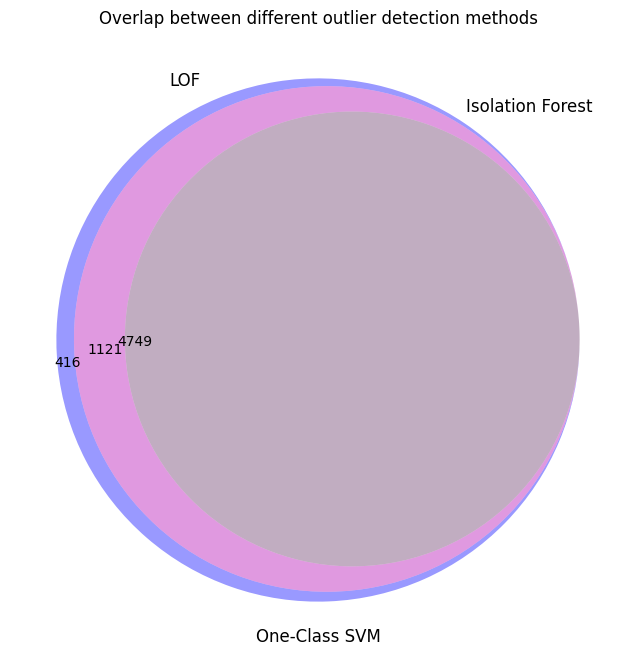

In [5]:
lof_set = set(outliers_lof.index)
iso_set = set(outliers_iso_for.index)
oc_svm_set = set(outliers_oc_svm_gpu.index)

all_outliers = lof_set | oc_svm_set | iso_set
lof_iso = lof_set & iso_set
lof_oc_svm = lof_set & oc_svm_set
iso_oc_svm = iso_set & oc_svm_set

fig = plt.figure(figsize=(15, 8))

venn3([lof_set, iso_set, oc_svm_set], 
      set_labels=('LOF', 'Isolation Forest', 'One-Class SVM'))
plt.title('Overlap between different outlier detection methods')

plt.show()
plt.close()

#### Outliers

In [32]:
# MergedDataset[MergedDataset['_url_race'] == 'tour-de-suisse/1972/stage-6b']
RacesDataset = pd.read_csv('../dataset/races.csv')
CyclistsDataset = pd.read_csv('../dataset/cyclists.csv')
# RacesDataset[RacesDataset['_url'] == 'tour-de-suisse/1972/stage-6b']
counted = MergedDataset['_url_race'].value_counts()
RacesDataset[RacesDataset['_url'] == "tour-de-suisse/1972/stage-6b"]['name'].values[0]

'Tour de Suisse'

HERE: defaultdict(<class 'int'>, {'vuelta-a-espana/1989/stage-1': 3, 'tour-de-france/1997/stage-2': 2, 'tour-de-france/1990/stage-1': 2, 'tour-de-france/1992/stage-7': 3, 'tour-de-france/1990/stage-9': 2, 'la-fleche-wallone/1996/result': 2, 'tour-de-france/1991/stage-12': 2, 'tour-de-france/1989/stage-17': 1, 'tour-de-france/1997/stage-5': 2, 'tour-de-france/1992/stage-15': 2, 'paris-nice/1989/stage-5': 1, 'liege-bastogne-liege/1992/result': 2, 'vuelta-a-espana/1997/stage-20': 3, 'tour-de-france/1997/stage-8': 2, 'tour-de-france/1989/stage-12': 1, 'tour-de-france/1995/stage-2': 2, 'giro-d-italia/1994/stage-21': 2, 'tour-de-france/1992/stage-16': 2, 'tour-de-france/1995/stage-7': 2, 'tour-de-france/1990/stage-7': 2, 'vuelta-a-espana/1997/stage-6': 4, 'tour-de-france/1989/stage-19': 1, 'paris-nice/1990/stage-2': 2, 'amstel-gold-race/1994/result': 1, 'omloop-het-nieuwsblad/1992/result': 3, 'tour-de-france/1993/stage-11': 2, 'tour-de-france/1997/stage-14': 2, 'milano-sanremo/1991/result': 

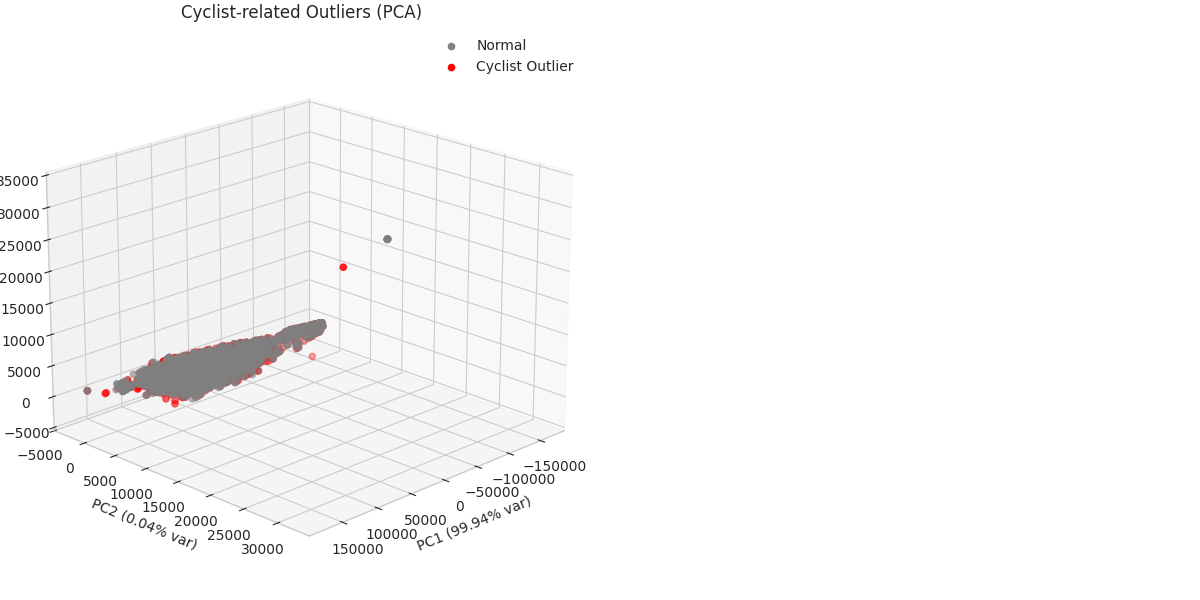

In [4]:
%matplotlib widget
from outliers_code.outliers_analysis import visualize_outlier_types, print_outlier_summary

summary = visualize_outlier_types(
    data=MergedDataset,
    lof_set=outliers_lof.index,
    iso_set=outliers_iso_for.index,
    oc_svm_set=outliers_oc_svm_gpu.index,
    min_races_threshold=1  # Minimum races to consider patterns significant
)

print_outlier_summary(summary)

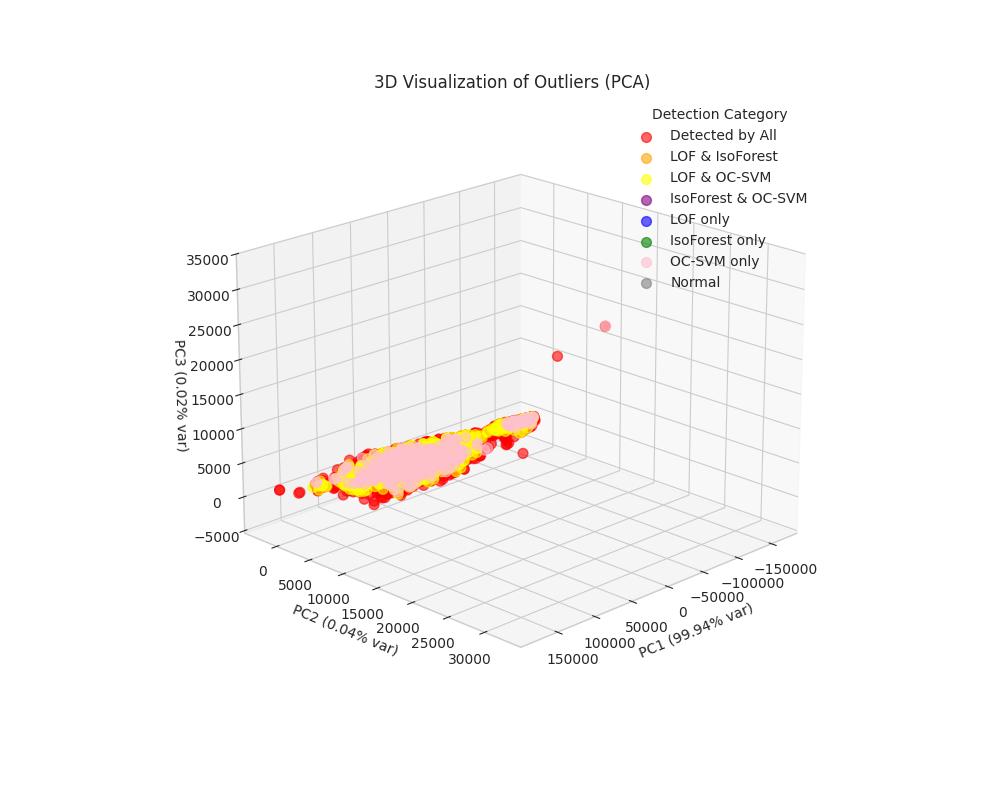

In [7]:
%matplotlib widget
from outliers_code.outliers_analysis import visualize_outliers_3d

visualize_outliers_3d(NumericalDataset.loc[all_outliers_indexes], lof_set, iso_set, oc_svm_set)


### Z-scores, box plots

In [8]:
from outliers_code.outliers_analysis import (
    calculate_z_score, 
    plot_outlier_scores, 
    plot_z_score_distributions,    
)

NumericalDataset = normal_lof.select_dtypes(include=[np.number])
stats = NumericalDataset.agg(['mean', 'std'])
data_mean, data_std = stats.loc['mean'], stats.loc['std']



data_tuples = [
    (outliers_lof[NumericalDataset.columns], data_mean, data_std),
    (outliers_iso_for[NumericalDataset.columns], data_mean, data_std),
    (outliers_oc_svm_gpu[NumericalDataset.columns], data_mean, data_std)
]
with Pool() as pool:
    z_scores = pool.map(calculate_z_score, data_tuples)

z_scores_lof, z_scores_iso_for, z_scores_oc_svm = z_scores



#### Histogram plots of outliers z-scores

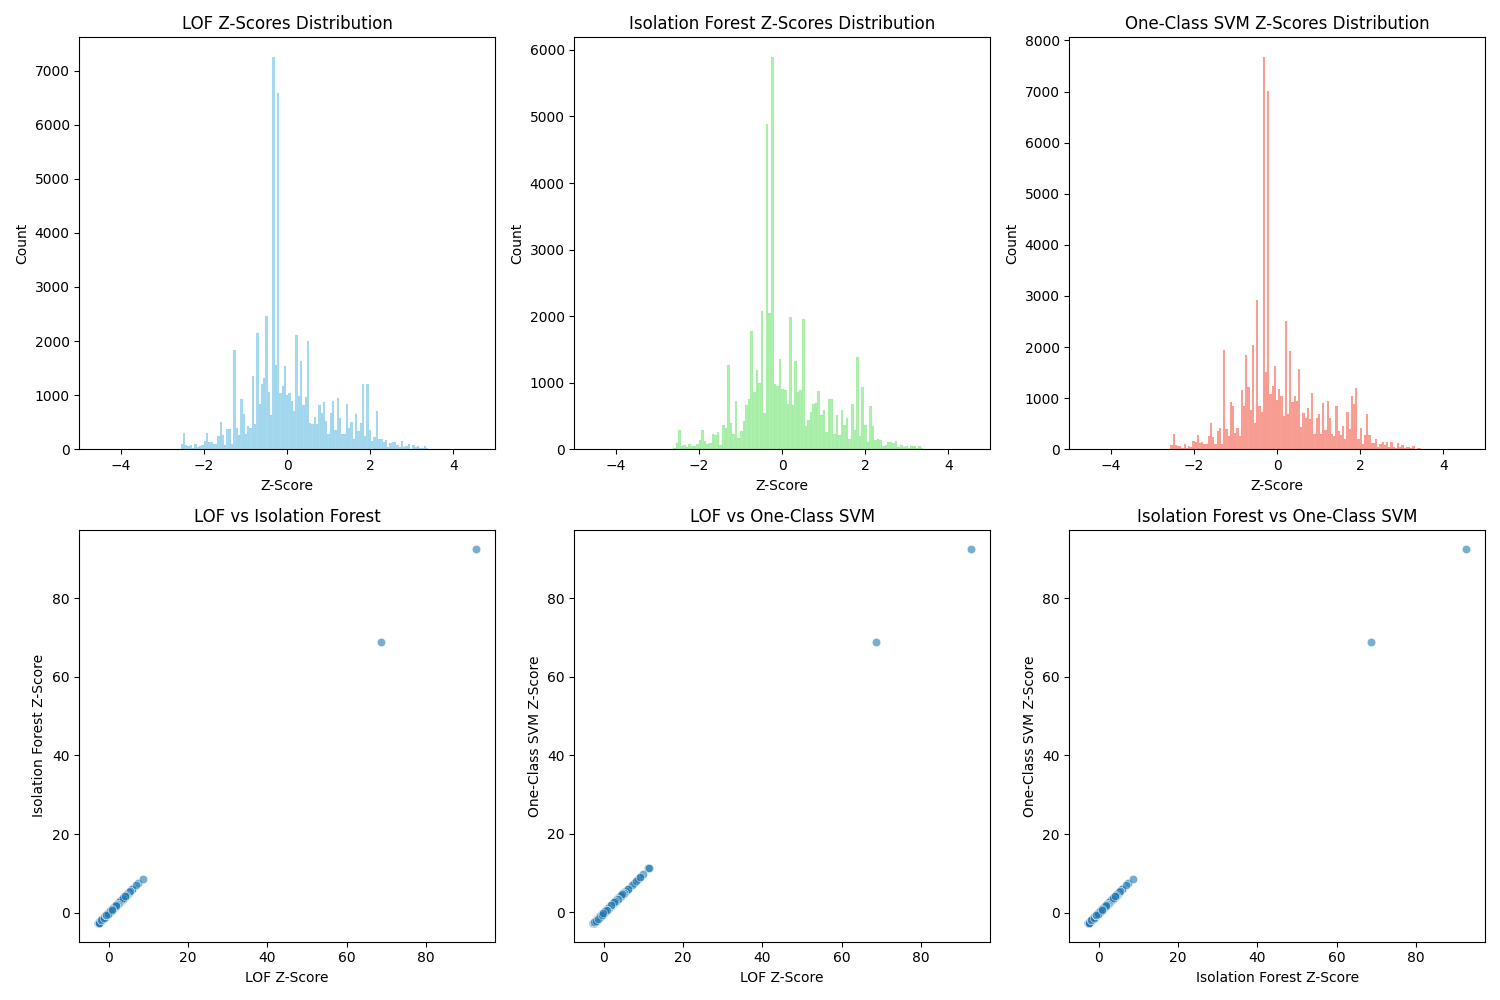

In [9]:
plot_outlier_scores(z_scores_lof, z_scores_iso_for, z_scores_oc_svm)

#### Box plots of outliers z-scores

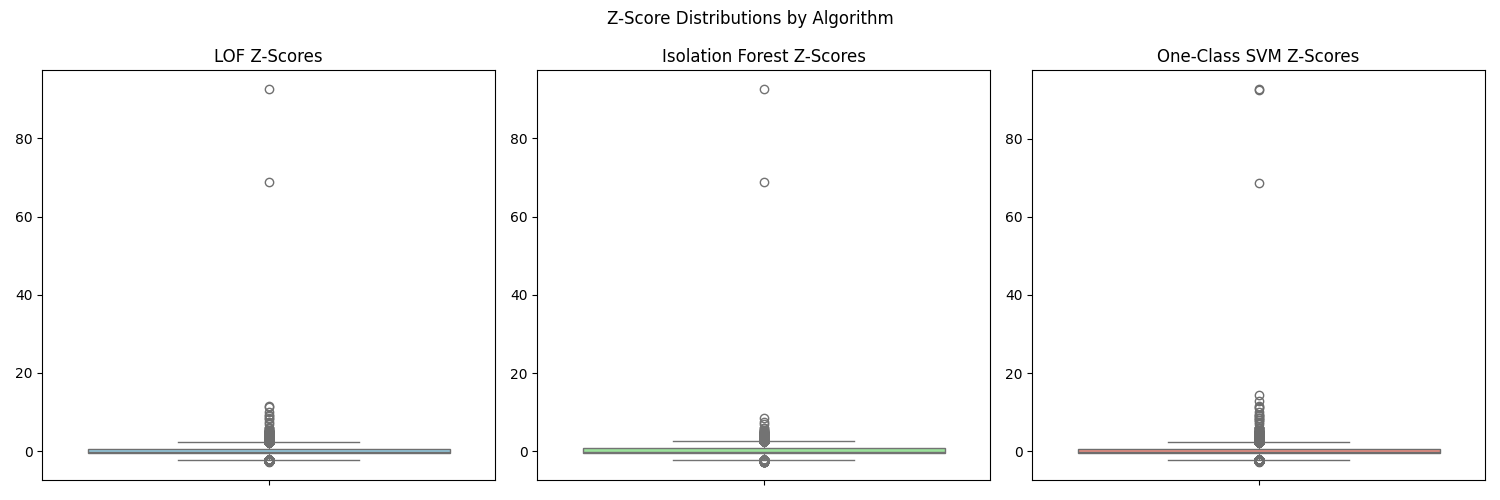

In [10]:
z_scores_dict = {
    "LOF": z_scores_lof,
    "Isolation Forest": z_scores_iso_for,
    "One-Class SVM": z_scores_oc_svm
}

plot_z_score_distributions(z_scores_dict)

### Temporal analysis

In [11]:
from outliers_code.outliers_analysis import create_temporal_visualizations


plots = create_temporal_visualizations(MergedDataset, MergedDataset.loc[all_outliers_indexes])

plots['heatmap'].show()
